## PROYECTO INGENIERÍA (modelo crediticio)
Ilse Regina Flores Reyes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from bins import bins
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc


In [2]:
#pip install seaborn 

In [3]:
pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
##installment es el la mensualidad

In [5]:
df = pd.read_csv("credit_data.csv")
df

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Fully Paid,credit_card
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Charged Off,car
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Fully Paid,small_business
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Fully Paid,other
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Current,other
...,...,...,...,...,...,...,...,...,...
466280,18400,60 months,432.64,C,4 years,MORTGAGE,110000.0,Current,debt_consolidation
466281,22000,60 months,582.50,D,10+ years,MORTGAGE,78000.0,Charged Off,debt_consolidation
466282,20700,60 months,514.34,D,7 years,MORTGAGE,46000.0,Current,debt_consolidation
466283,2000,36 months,62.59,A,3 years,OWN,83000.0,Fully Paid,credit_card


In [6]:
df.isnull().sum()

loan_amnt             0
term                  0
installment           0
grade                 0
emp_length        21008
home_ownership        0
annual_inc            4
loan_status           0
purpose               0
dtype: int64

In [7]:
pd.DataFrame(df.dtypes.head(len(df)))

,0
loan_amnt,int64
term,object
installment,float64
grade,object
emp_length,object
home_ownership,object
annual_inc,float64
loan_status,object
purpose,object


In [8]:
cat=df.select_dtypes(include=['object'])
cat

,term,grade,emp_length,home_ownership,loan_status,purpose
0,36 months,B,10+ years,RENT,Fully Paid,credit_card
1,60 months,C,< 1 year,RENT,Charged Off,car
2,36 months,C,10+ years,RENT,Fully Paid,small_business
3,36 months,C,10+ years,RENT,Fully Paid,other
4,60 months,B,1 year,RENT,Current,other
...,...,...,...,...,...,...
466280,60 months,C,4 years,MORTGAGE,Current,debt_consolidation
466281,60 months,D,10+ years,MORTGAGE,Charged Off,debt_consolidation
466282,60 months,D,7 years,MORTGAGE,Current,debt_consolidation
466283,36 months,A,3 years,OWN,Fully Paid,credit_card


In [9]:
num=df.select_dtypes(include=['int64','float64'])
num

,loan_amnt,installment,annual_inc
0,5000,162.87,24000.0
1,2500,59.83,30000.0
2,2400,84.33,12252.0
3,10000,339.31,49200.0
4,3000,67.79,80000.0
...,...,...,...
466280,18400,432.64,110000.0
466281,22000,582.50,78000.0
466282,20700,514.34,46000.0
466283,2000,62.59,83000.0


In [10]:
df.describe()

,loan_amnt,installment,annual_inc
count,466285.000000,466285.000000,4.662810e+05
mean,14317.277577,432.061201,7.327738e+04
std,8286.509164,243.485550,5.496357e+04
min,500.000000,15.670000,1.896000e+03
25%,8000.000000,256.690000,4.500000e+04
50%,12000.000000,379.890000,6.300000e+04
75%,20000.000000,566.580000,8.896000e+04
max,35000.000000,1409.990000,7.500000e+06


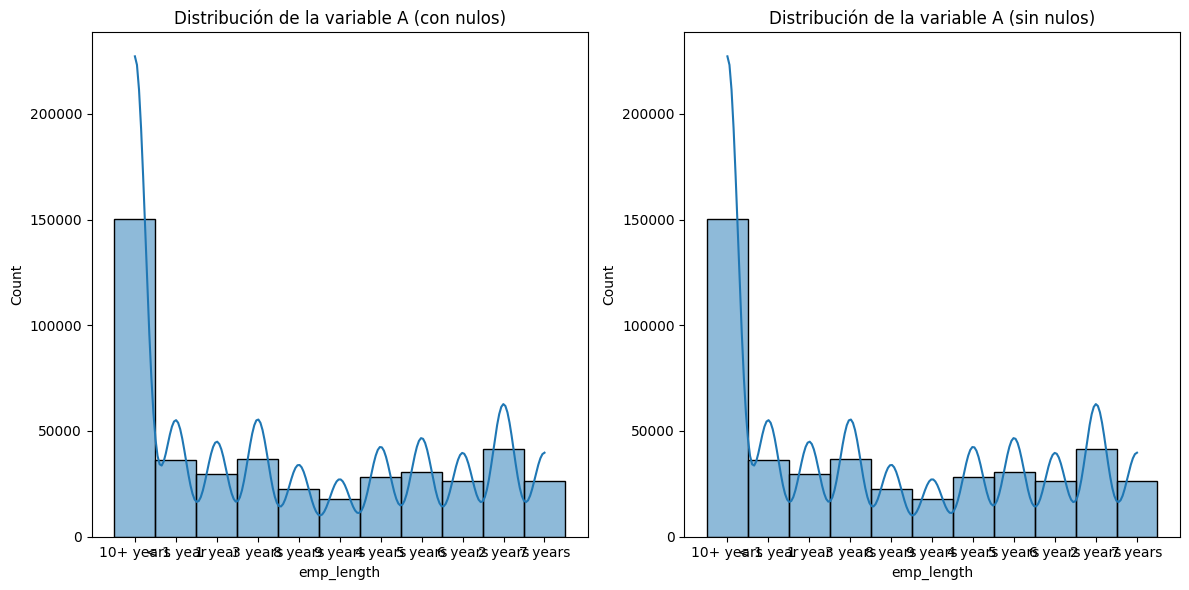

In [11]:
# Visualizar la distribución antes de eliminar nulos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['emp_length'], kde=True)
plt.title('Distribución de la variable A (con nulos)')

# Eliminar valores nulos
df_cleaned = df.dropna()

# Visualizar la distribución después de eliminar nulos
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['emp_length'], kde=True)
plt.title('Distribución de la variable A (sin nulos)')

plt.tight_layout()
plt.show()

No cambia la distribución si eliminamos los nulos

In [12]:
#Visualizar todo junto
def reporte(df_cleaned):
    dtyp = pd.DataFrame(df_cleaned.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(df_cleaned.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(df_cleaned.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(df_cleaned.max(), columns=['Max'])
    minimo = pd.DataFrame(df_cleaned.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)
reporte(df_cleaned)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
loan_amnt,int64,0,1351,35000,500
term,object,0,2,60 months,36 months
installment,float64,0,54665,1409.99,15.67
grade,object,0,7,G,A
emp_length,object,0,11,< 1 year,1 year
home_ownership,object,0,6,RENT,ANY
annual_inc,float64,0,28432,7500000.0,1896.0
loan_status,object,0,9,Late (31-120 days),Charged Off
purpose,object,0,14,wedding,car


In [13]:
df_cleaned.describe()

,loan_amnt,installment,annual_inc
count,445273.000000,445273.000000,4.452730e+05
mean,14448.240349,435.470060,7.440255e+04
std,8298.615636,243.844362,5.559042e+04
min,500.000000,15.670000,1.896000e+03
25%,8000.000000,259.990000,4.550000e+04
50%,12375.000000,383.010000,6.450000e+04
75%,20000.000000,570.840000,9.000000e+04
max,35000.000000,1409.990000,7.500000e+06


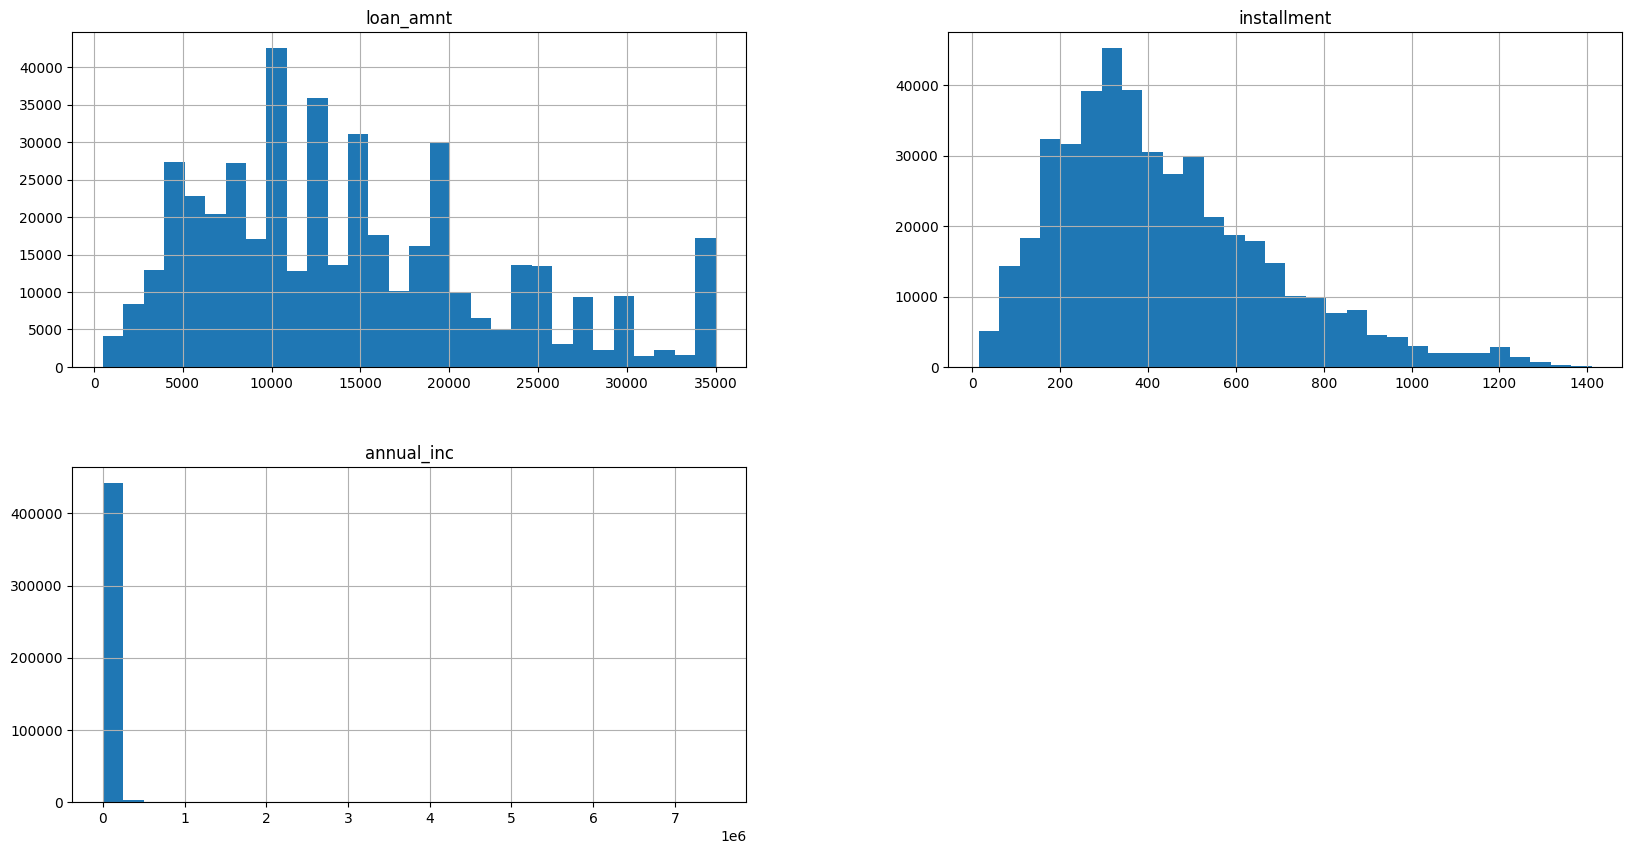

In [14]:
#Histogramas
df_cleaned.hist(bins=30,figsize=(20,10))
plt.show()

In [15]:
df_cleaned.shape

(445273, 9)

In [16]:
# Define una función para mapear las categorías
def categorizar_loan_status(estado):
    if estado in ['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']:
        return 0
    else:
        return 1

In [17]:
# Aplica la función para crear la nueva variable Y
df_cleaned['Y'] = df_cleaned['loan_status'].apply(categorizar_loan_status)


/var/folders/03/n892pfl91qs5w3pt_jgmkj5m0000gn/T/ipykernel_1965/2872462532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Y'] = df_cleaned['loan_status'].apply(categorizar_loan_status)


In [18]:
# Elimina la columna loan_status original
df_cleaned.drop('loan_status', axis=1, inplace=True)

/var/folders/03/n892pfl91qs5w3pt_jgmkj5m0000gn/T/ipykernel_1965/1613475774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('loan_status', axis=1, inplace=True)


In [19]:
df_cleaned

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,purpose,Y
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,credit_card,1
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,car,0
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,small_business,1
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,other,1
4,3000,60 months,67.79,B,1 year,RENT,80000.0,other,1
...,...,...,...,...,...,...,...,...,...
466280,18400,60 months,432.64,C,4 years,MORTGAGE,110000.0,debt_consolidation,1
466281,22000,60 months,582.50,D,10+ years,MORTGAGE,78000.0,debt_consolidation,0
466282,20700,60 months,514.34,D,7 years,MORTGAGE,46000.0,debt_consolidation,1
466283,2000,36 months,62.59,A,3 years,OWN,83000.0,credit_card,1


In [20]:
df=df_cleaned.copy()

In [21]:
from typing import Dict, List

class BinningTransformer:
    def __init__(self, bins: Dict):
        self.bins = bins
       
    def __find_bin(self, value: float, mappings: List):
        for mapping in mappings:
            if value <= mapping["max"]:
                return mapping["label"]
        return "Error"
       
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None) -> pd.DataFrame:
        X = X.copy()
        for key in self.bins.keys():
            X.loc[:, key] = X.loc[:, key].transform(lambda x: self.__find_bin(x, self.bins[key]))
        return X

In [22]:
x = BinningTransformer(bins)
print(x)

In [23]:
df = x.transform(df)
df

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,purpose,Y
0,"(-inf, 8000)",36 months,"(-inf, 260)",B,10+ years,RENT,"(120, inf)",credit_card,1
1,"(-inf, 8000)",60 months,"(-inf, 260)",C,< 1 year,RENT,"(120, inf)",car,0
2,"(-inf, 8000)",36 months,"(-inf, 260)",C,10+ years,RENT,"(120, inf)",small_business,1
3,"(8000, 12000)",36 months,"(260, 383)",C,10+ years,RENT,"(120, inf)",other,1
4,"(-inf, 8000)",60 months,"(-inf, 260)",B,1 year,RENT,"(120, inf)",other,1
...,...,...,...,...,...,...,...,...,...
466280,"(12000, 20000)",60 months,"(383, 570)",C,4 years,MORTGAGE,"(120, inf)",debt_consolidation,1
466281,"(20000, inf)",60 months,"(570, inf)",D,10+ years,MORTGAGE,"(120, inf)",debt_consolidation,0
466282,"(20000, inf)",60 months,"(383, 570)",D,7 years,MORTGAGE,"(120, inf)",debt_consolidation,1
466283,"(-inf, 8000)",36 months,"(-inf, 260)",A,3 years,OWN,"(120, inf)",credit_card,1


In [24]:
df = df[df['home_ownership'] != 'ANY']

In [25]:
#valores únicos
unival = pd.DataFrame(df.nunique(), columns=['Valores_Unicos'])
unival

,Valores_Unicos
loan_amnt,4
term,2
installment,4
grade,7
emp_length,11
home_ownership,5
annual_inc,1
purpose,14
Y,2


In [26]:
X = df[["loan_amnt","term","installment","grade","emp_length","home_ownership","annual_inc","purpose"]]
Y = df["Y"]

In [27]:
class WOETransformer:
    def __init__(self, columns: List[str], target_mappings: Dict = {0: "good", 1: "bad"}):
        self.target_mappings = target_mappings
        self.columns = columns
        self.woe_mappings = None
    
    def __get_absolute_odds(self, df: pd.DataFrame, col: str):
        key_first, key_second = list(self.target_mappings.keys())
        return (
            df.query(f"status=={key_first}")
            .groupby(col).size().reset_index()
            .rename(columns={0: self.target_mappings[key_first]})
            .set_index(col)
        ).join(
            df.query(f"status=={key_second}")
            .groupby(col).size().reset_index()
            .rename(columns={0: self.target_mappings[key_second]})
            .set_index(col)
        ).reset_index()[[col, "good", "bad"]]

 

    @staticmethod
    def __calculate_relative_odds(row: pd.Series, total_good: int, total_bad: int) -> pd.Series:
        return pd.Series(
            {
                **row.to_dict(),
                "good": row["good"] / total_good,
                "bad": row["bad"] / total_bad
            }
        )

 

    def __get_odds(self, df: pd.DataFrame, col: str,
                   absolute_values: bool = False) -> pd.DataFrame:
        key_first, key_second = list(self.target_mappings.keys())
        odds_absolute = self.__get_absolute_odds(df, col)

 

        if absolute_values:
            return odds_absolute

 

        # Relative Odds
        total_good = odds_absolute["good"].sum()
        total_bad = odds_absolute["bad"].sum()
        return odds_absolute.apply(
            lambda row: WOETransformer.__calculate_relative_odds(row, total_good, total_bad),
            axis=1
        )

 

    @staticmethod
    def __calculate_woe(row: pd.Series) -> pd.Series:
        return pd.Series(
            {
                **row.to_dict(),
                "woe": np.log(row["good"] / row["bad"]),
                "info_val": (row["good"] - row["bad"]) * np.log(row["good"] / row["bad"])
            }
        )

 

    def __set_woe_mappings(self, X: pd.DataFrame, y: pd.Series,
                           absolute_values: bool = False) -> None:
        df = X.copy()
        df["status"] = y
        
        self.woe_mappings = {
            col: self.__get_odds(df, col, absolute_values)\
                .apply(lambda row: WOETransformer.__calculate_woe(row), axis=1)\
                .sort_values(by="woe", axis=0, ascending=True)
            for col in self.columns
        }
        
    def fit(self, X: pd.DataFrame, y: pd.DataFrame, *args, **kwargs):
        self.__set_woe_mappings(X, y, *args, **kwargs)
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None) -> pd.DataFrame:
        if self.woe_mappings is None:
            raise NotFittedError(f"This {self} instance is not fitted yet. Call 'fit' with appropriate arguments before using this transformer.")
        df = X.copy()
        out = pd.DataFrame([])
        for col in df.columns:
            mapping = self.woe_mappings[col].set_index(col)
            categories = list(mapping.index)
            out[col] = df.loc[:, col].apply(lambda cat: mapping.loc[cat, "woe"])
        return out

In [28]:
x = WOETransformer(X).fit(X,Y)
x

In [29]:
set(X.home_ownership)

{'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'}

In [30]:
X = X[X["home_ownership"] != "ANY"]

In [31]:
set(X.home_ownership)

{'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'}

In [32]:
X[X["home_ownership"] == "ANY"]

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,purpose


In [33]:
X = x.transform(X)
X

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,purpose
0,-0.071562,-0.140517,-0.099956,-0.372660,-0.091971,0.159562,0.0,-0.272285
1,-0.071562,0.304334,-0.099956,0.053971,0.107228,0.159562,0.0,-0.231017
2,-0.071562,-0.140517,-0.099956,0.053971,-0.091971,0.159562,0.0,0.812989
3,-0.020393,-0.140517,-0.009523,0.053971,-0.091971,0.159562,0.0,0.265977
4,-0.071562,0.304334,-0.099956,-0.372660,0.037460,0.159562,0.0,0.265977
...,...,...,...,...,...,...,...,...
466280,0.020975,0.304334,0.064327,0.053971,0.014227,-0.142780,0.0,0.043228
466281,0.076334,0.304334,0.039165,0.400922,-0.091971,-0.142780,0.0,0.043228
466282,0.076334,0.304334,0.064327,0.400922,0.032097,-0.142780,0.0,0.043228
466283,-0.071562,-0.140517,-0.099956,-1.135533,0.013526,-0.011734,0.0,-0.272285


In [34]:
df = pd.concat([X, Y], axis=1)
df

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,purpose,Y
0,-0.071562,-0.140517,-0.099956,-0.372660,-0.091971,0.159562,0.0,-0.272285,1
1,-0.071562,0.304334,-0.099956,0.053971,0.107228,0.159562,0.0,-0.231017,0
2,-0.071562,-0.140517,-0.099956,0.053971,-0.091971,0.159562,0.0,0.812989,1
3,-0.020393,-0.140517,-0.009523,0.053971,-0.091971,0.159562,0.0,0.265977,1
4,-0.071562,0.304334,-0.099956,-0.372660,0.037460,0.159562,0.0,0.265977,1
...,...,...,...,...,...,...,...,...,...
466280,0.020975,0.304334,0.064327,0.053971,0.014227,-0.142780,0.0,0.043228,1
466281,0.076334,0.304334,0.039165,0.400922,-0.091971,-0.142780,0.0,0.043228,0
466282,0.076334,0.304334,0.064327,0.400922,0.032097,-0.142780,0.0,0.043228,1
466283,-0.071562,-0.140517,-0.099956,-1.135533,0.013526,-0.011734,0.0,-0.272285,1


In [35]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('Y', axis=1), df['Y'], test_size=0.2, random_state=42)

Matriz de Confusión:
[[    0  9530]
 [    0 79525]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9530
           1       0.89      1.00      0.94     79525

    accuracy                           0.89     89055
   macro avg       0.45      0.50      0.47     89055
weighted avg       0.80      0.89      0.84     89055



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

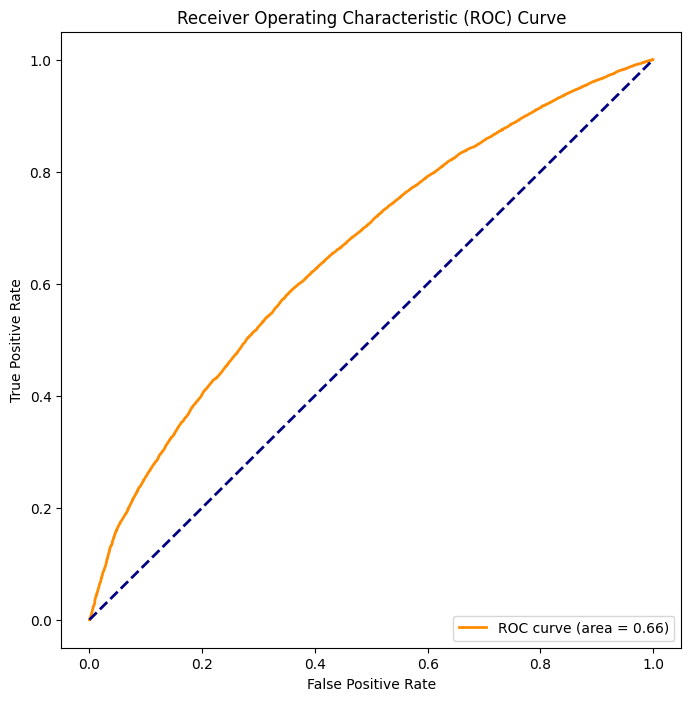


Área bajo la curva (AUC): 0.66


In [40]:
# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular el informe de clasificación, que incluye F1-score
class_report = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(class_report)

# Calcular la probabilidad de predicción para las clases positivas
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Imprimir el AUC
print("\nÁrea bajo la curva (AUC): {:.2f}".format(roc_auc))